In [1]:
import re
import math
import pandas as pd
import folium
import seaborn as sns
import webbrowser
import numpy as np
import seaborn as sns
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif']=['SimHei'] 

In [2]:
starbuck_df = pd.read_excel('/Users/patientman/Downloads/Starbucks_rawdata.xlsx')

In [3]:
starbuck_df.head(1)

,name,stars,review_count,price,score,poi,cityname,address
0,星巴克虹桥机场T2到达店,40,344,¥40/人,口味:8.2 环境:7.8 服务:7.9,"{""lat"": 121.327224, ""lng"": 31.193611}",上海市,虹桥国际机场2号航站楼禁区外到达公众区0L-1号商铺


In [4]:
luckin_df = pd.read_excel('/Users/patientman/Downloads/Luckin_rawdata.xlsx')

In [5]:
luckin_df.head(1)

,name,stars,review_count,price,score,poi,cityname,address
0,luckin coffee瑞幸咖啡,40,359,¥22/人,口味:8.2 环境:8.5 服务:8.6,"{""lat"": 121.443337, ""lng"": 31.279693}",上海市,广中西路555号宝华国际广场一层101室


## 地理位置

In [6]:
# 数据清洗过程
def convert_poi2lis(df):
    # poi数据转化为可以绘制热力图的list
    for i in range(len(df)):
        df.loc[i,'lat'] = eval(df.loc[i,'poi'])['lat']
        df.loc[i,'lng'] = eval(df.loc[i,'poi'])['lng']
    poi_lis = [[row['lng'], row['lat']] for name, row in df.iterrows()] 
    return poi_lis

In [7]:
starbuck_df_poi_lis = convert_poi2lis(starbuck_df)

In [8]:
luckin_df_poi_lis = convert_poi2lis(luckin_df)

In [9]:
# 绘制星巴克热力图(以上海为例)
starbuck_heatmap = folium.Map(location=[31.1900, 121.4990], zoom_start=10)
starbuck_heatmap.add_children(HeatMap(starbuck_df_poi_lis))
starbuck_heatmap.save("starbuck_heatmap.html")

/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
starbuck_heatmap

In [11]:
# 绘制瑞幸热力图(以上海为例)
luckin_heatmap = folium.Map(location=[31.1900, 121.4990], zoom_start=11)
luckin_heatmap.add_children(HeatMap(luckin_df_poi_lis))
luckin_heatmap.save("luckin_heatmap.html")

/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
luckin_heatmap

## 门店数量

In [13]:
# 整体门店数量对比
star_num = len(starbuck_df)
luck_num = len(luckin_df)

In [14]:
print(star_num, luck_num)

1997 1325


In [15]:
# 各市门店数量对比
# 星巴克
starbuck_df.groupby('cityname').size()

cityname
上海市    687
北京市    309
南京市    109
厦门市     17
广州市    159
成都市    127
杭州市    205
深圳市    152
苏州市    174
郑州市     24
青岛市     34
dtype: int64

In [16]:
# 瑞幸
luckin_df.groupby('cityname').size()

cityname
上海市    315
北京市    307
南京市    116
广州市    174
成都市    122
杭州市    133
深圳市    158
dtype: int64

In [17]:
# 数据中的共有城市
luckin_city_df = pd.DataFrame(luckin_df.groupby('cityname').size())
starbuck_city_df = pd.DataFrame(starbuck_df.groupby('cityname').size())
common_city = list(luckin_city_df.index & starbuck_city_df.index)
luckin_city_df = luckin_city_df[luckin_city_df.index.isin(common_city)]
starbuck_city_df = starbuck_city_df[starbuck_city_df.index.isin(common_city)]

In [18]:
city_df = pd.DataFrame(index=common_city,columns=['瑞幸','星巴克'])

In [19]:
city_df = pd.merge(starbuck_city_df, luckin_city_df, on='cityname')

In [20]:
city_df = city_df.rename(columns={'0_x':'星巴克','0_y':'瑞幸'})

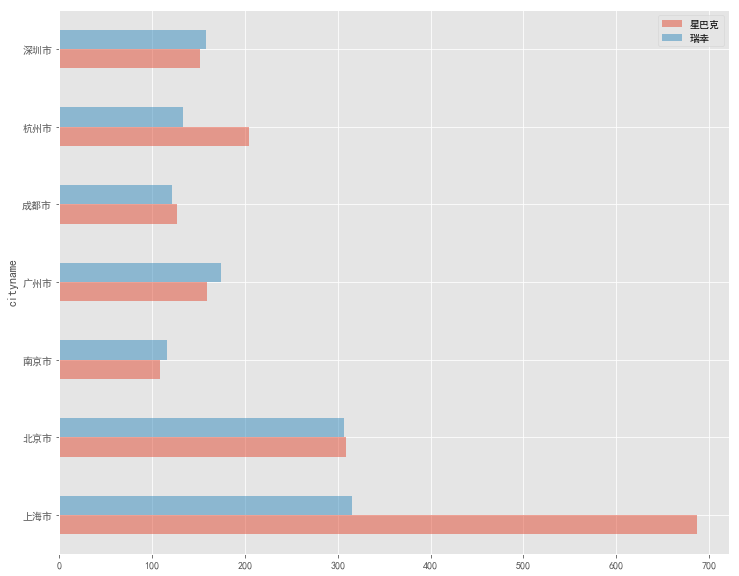

In [21]:
ax = city_df.plot.barh(alpha=0.5 , figsize=(12,10))
fig = ax.get_figure()
fig.savefig('/Users/patientman/Desktop/产品盐/3-热门城市门店数量对比.png')

## 价格

In [22]:
def convert_price(df):
    # 价格转化为可用价格
    for i in range(len(df)):
        if df.loc[i,'price'] is not np.nan:
            df.loc[i,'rprice'] = re.findall('\d+', df.loc[i,'price'])[0]

In [23]:
convert_price(starbuck_df)

In [24]:
convert_price(luckin_df)

/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


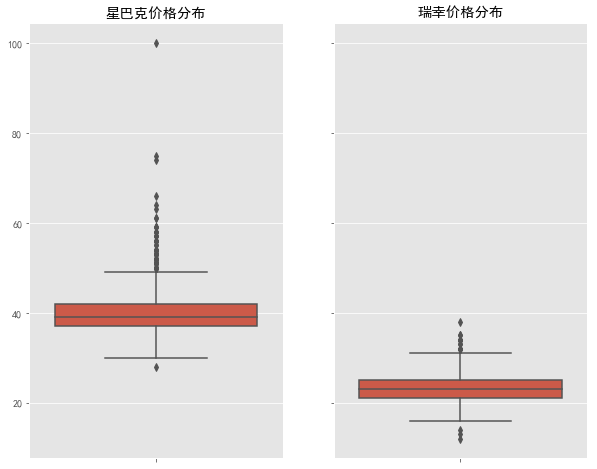

In [25]:
fig, axes=plt.subplots(1,2,sharey=True,figsize=(10,8))
# 绘制星巴克价格箱型图
sns.boxplot(x=[int(price) for price in starbuck_df['rprice'] if type(price) is not float], orient='v', ax=axes[0])
# 绘制瑞幸价格箱型图
sns.boxplot(x=[int(price) for price in luckin_df['rprice'] if type(price) is not float], orient='v', ax=axes[1])
axes[0].set_title('星巴克价格分布')
axes[1].set_title('瑞幸价格分布')

fig.savefig('/Users/patientman/Desktop/产品盐/4-价格分布.png')

In [26]:
pd.DataFrame([int(price) for price in starbuck_df['rprice'] if type(price) is not float]).describe()

,0
count,1884.000000
mean,39.994692
std,4.907425
min,28.000000
25%,37.000000
50%,39.000000
75%,42.000000
max,100.000000


In [27]:
pd.DataFrame([int(price) for price in luckin_df['rprice'] if type(price) is not float]).describe()

,0
count,735.000000
mean,23.227211
std,3.229854
min,12.000000
25%,21.000000
50%,23.000000
75%,25.000000
max,38.000000


## 评分

In [28]:
def convert_score(df):
    # 评分转化为3列
    search_pattern = re.compile(r'口味:(\d+.\d+) 环境:(\d+.\d+) 服务:(\d+.\d+)')
    for i in range(len(df)):
        if df.loc[i,'score'] is not np.nan:
            data_score = re.findall(search_pattern, df.loc[i,'score'])
            df.loc[i, 'flavor'] = float(data_score[0][0])
            df.loc[i, 'environment'] = float(data_score[0][1])
            df.loc[i, 'service'] = float(data_score[0][2])

In [ ]:
convert_score(starbuck_df)

In [ ]:
convert_score(luckin_df)

In [ ]:
# 瑞幸评分_口味、评分_环境、评分_服务的统计性描述
print(luckin_df['flavor'].describe(), luckin_df['environment'].describe(), luckin_df['service'].describe())

In [ ]:
# 星巴克评分_口味、评分_环境、评分_服务的统计性描述
print(starbuck_df['flavor'].describe(), starbuck_df['environment'].describe(), starbuck_df['service'].describe())

In [ ]:
# 瑞幸、星巴克各评分箱型图
fig, axes=plt.subplots(1, 6, sharey=True, figsize=(10,8))
fig.subplots_adjust(wspace=2.5)

sns.boxplot(x='flavor', data=starbuck_df, orient='v', ax=axes[0], color='g')
sns.boxplot(x='environment', data=starbuck_df, orient='v', ax=axes[1], color='g')
sns.boxplot(x='service', data=starbuck_df, orient='v', ax=axes[2], color='g')
axes[0].set_title('星巴克口味评分')
axes[1].set_title('星巴克环境评分')
axes[2].set_title('星巴克服务评分')

sns.boxplot(x='flavor', data=luckin_df, orient='v', ax=axes[3], color='b')
sns.boxplot(x='environment', data=luckin_df, orient='v', ax=axes[4], color='b')
sns.boxplot(x='service', data=luckin_df, orient='v', ax=axes[5], color='b')
axes[3].set_title('瑞幸口味评分')
axes[4].set_title('瑞幸环境评分')
axes[5].set_title('瑞幸服务评分')

fig.savefig('/Users/patientman/Desktop/产品盐/5-评分维度.png')

## 评论

In [ ]:
# 星巴克评论数统计描述
# 平均每个店铺评论数为222
# 1/4位的评论数为59
# 中位的评论数为127
# 3/4位的评论数为255
starbuck_df['review_count'].describe()

In [ ]:
# 75%分位以下的星巴克评论数分布
sns.distplot(starbuck_df[starbuck_df['review_count'] <= 255]['review_count'])

In [ ]:
# 评论数最大的星巴克
starbuck_df[starbuck_df['review_count'] == starbuck_df['review_count'].max()]

In [ ]:
# 瑞幸评论数统计描述
# 平均每个店铺评论数为32
# 1/4位的评论数为8
# 中位的评论数为19
# 3/4位的评论数为38
luckin_df['review_count'].describe()

In [ ]:
# 全部瑞幸的评论数分布
sns.distplot(luckin_df['review_count'])

In [ ]:
# 评论数最大的瑞幸
luckin_df[luckin_df['review_count'] == luckin_df['review_count'].max()]

## 优质门店画像

#### 瑞幸优质门店统计描述

In [ ]:
luckin_df['mean_score'] = (luckin_df['flavor'] + luckin_df['environment'] + luckin_df['service'])/3

In [ ]:
luckin_df[(luckin_df['mean_score'] > luckin_df.describe()['mean_score']['75%']) & (luckin_df['review_count'] > luckin_df.describe()['review_count']['75%'])].describe()

#### 星巴克优质门店统计描述

In [ ]:
starbuck_df['mean_score'] = (starbuck_df['flavor'] + starbuck_df['environment'] + starbuck_df['service'])/3

In [ ]:
starbuck_df[(starbuck_df['mean_score'] > starbuck_df.describe()['mean_score']['75%']) & (starbuck_df['review_count'] > starbuck_df.describe()['review_count']['75%'])].describe()

In [ ]:
# pari_luckin_df = luckin_df[['stars','review_count','rprice','flavor','environment','service']].dropna()
# pari_luckin_df = pari_luckin_df.astype('int')
# sns.regplot(x='flavor', y='environment', data=pari_luckin_df)

In [ ]:
# pari_starbuck_df = starbuck_df[['flavor','environment','service']].dropna()
# pari_starbuck_df = pari_starbuck_df.astype('int')
# sns.pairplot(pari_starbuck_df, diag_kind='kde', plot_kws={'alpha': 0.1})

In [ ]:
# pari_luckin_df = luckin_df[['flavor','environment','service']].dropna()
# pari_luckin_df = pari_luckin_df.astype('int')
# sns.pairplot(pari_luckin_df, diag_kind='kde', plot_kws={'alpha': 0.1})

In [ ]:
# sns.pairplot(pari_starbuck_df, x_vars=['environment','service'], y_vars='flavor', size=7, aspect=0.8, kind='reg')